<a href="https://colab.research.google.com/github/carloscarvajal1cc/UTS_MachineLearning_Assigment2/blob/carlos-change/Assigment2_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: titulo aqui






<br>32513 Machine Learning Spring 2019
<br>By Carlos Mario Carvajal Moreno. Student ID: 13144148
<br>and Andres Felipe Lagos Rodriguez. Student ID: 13092248
    




trying a new change

# Abstract



<p align="justify"> 

---
### index 


---



# I. Introduction
<br><p align="justify"> Define Problem; Justify
Significance W-200**

# II. Exploration

<br><p align="justify"> identify challenges; design data structures, plan data models and tests (300)


# III. Methodology
<br>
<p align="justify"> Implement algorithms; build and train data models (300 words)

# IV. Evaluation
<br>
<p align="justify"> Report execution on data, perform and report testing,
perform efficiency analysis, do possible comparative analysis 200 words.

# V.	Conclusion

<br><p align="justify"> Discuss reflections, proppose possible improvements.
 




# VI.	Ethical Discussion

<br><p align="justify"> 
  {The report includes discussions about the social/ethical aspect of the proposed technique/
project. You can adopt one or more ethical models, such as the utilitarian approach or the
Kantian duty-based approach. You should anticipate the potential misuses of your technique. }

# VII.	References.





The report is clearly structured and well written.

The practical problem is well-motivated with clear practical significance. The design/planning
of the research/development is clear and logical, including considerations about data
acquisition, quality control, modelling techniques, evaluation method and criteria, etc.
The design of data models and experiments is logical. The implementation is correct, efficient
and practically complete (comparing, or at least, considering alternatives). The evaluation
report is convincing; the implementation of the experiments can be easily accessed from a
cloud-based service such as Github and replicated for assessment

#VIII. Draft and experimenting section

<br><p align="justify"> This section is designed to experiment and try to reinforce the authors claim or to show some of the aspects that were recomended for improvement, by using the technology capacity of today.

<br><p align="justify"> First, lets import a series of packages that will help developing the analysis:

In [0]:
import skimage
import numpy as np
import pandas as pd
import random as rd

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## VIII-I. Importing the dataset 

<p align="justify">Now, we import a public dataset from sklearn that is relevant for the domain of face recognition because the images contain variations in facial expressions, poses and lighting, which are relevant for the replication of the subject of this paper:

In [0]:
from sklearn.datasets import fetch_lfw_people

In [0]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [0]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


The following image correspond to Colin Powell


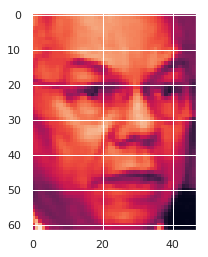

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

#Let's print the name of the second class in the dataset and the reconstruction 
# of the pixels in a plot.

picture_number =  #remember there are 1348 images, any image can be observed 
                    #choosing a number between 0 and 1348 as well as the
                      #corresponding name.

print("The following image correspond to {}".format(faces.target_names[
    faces.target[picture_number]]))
plt.imshow(faces.images[picture_number])


This dataset contains 1348 observations, 8 classes corresponding to 8 well known people and $62*47$ dimensions, defined by the number of pixels (2914 in total).



<br> Now we will use PCA and Eigenfaces as the approach used by the authors in the paper:

## VIII-II Eigenfaces and PCA

Lets import the PCA functions from Sklearn:

In [0]:
from sklearn.decomposition import PCA

Now we create or pca model. PCA performs a linear dimensionality reduction using Singular Value Decomposition (SVD) of the data, in this case of the image space, in order to achieve a lower dimensional image space. 

Let's assign 150 principal components and use randomized svd solver to 

In [0]:
pca = PCA(n_components = 150, svd_solver='randomized', whiten=True)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=True)

Now we have a dimensional reduced image space. Instead of having 2914 dimensions we now have 150, and have reduced the dimensionality of the data.

In [0]:
output = pca.fit_transform(faces.data)
output.shape

(1348, 150)

Consequently, we will use the output we created as output data, containing all the images but this time with 150 feautures.

In [0]:
# Let's assigned the arrays to our output matrix:
n_samples, h = output.shape

#let's call our output matrix X, where the second [1], array correspond to features
X = output.data
n_features = X.shape[1]

In [0]:
# lets formalized our output:

print("Total dataset size:")
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))

Total dataset size:
n_samples: 1348
n_features: 150


In [0]:
# now lets assigned y to the array containing the target values.

y = faces.target
target_names = faces.target_names
n_classes = target_names.shape[0]

In [0]:
print("n_classes: {}".format(n_classes))
print("The target values must be equal to the number of samples, which is {}".
      format(y.shape[0]))

n_classes: 8
The target values must be equal to the number of samples, which is 1348


In [0]:
# or the same procedure can be done by:

# n_samples, h, w = faces.images.shape

If we plot the variance explained by the number of components, we can observe that the first 80 components explain 90% of the variance of the images. Which mean that it is not necessary to consider a large number of dimensions in order to build a face recognition model.

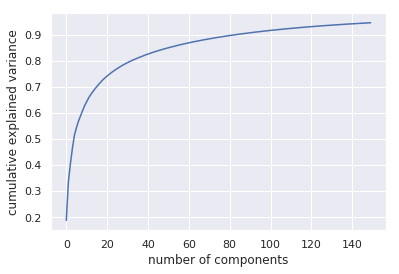

In [0]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Also, we can plot the variance effect of each component in the image set. For these purpose, I am just going to plot the first 10 components and their corresponding explained variance:

In [0]:
from sklearn.preprocessing import normalize
from sklearn import preprocessing

In [0]:
a = pca.explained_variance_ratio_[[range(10)]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


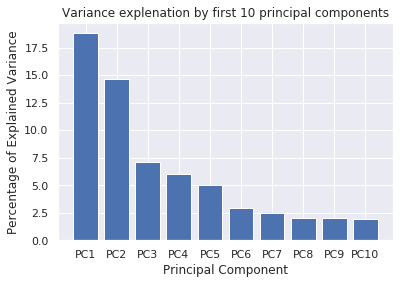

The sum of the first 10 components correspond to 63.0% of the variation explained by them


In [0]:
per_var = np.round(a*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Variance explenation by first 10 principal components')
plt.show()

print("The sum of the first 10 components correspond to {}% of the variation explained by them"
      .format(round(sum(a)*100)))

We will now visualize what the first images of our data set would look like by only considering the first number of components, in order to have an overview of what variations they consider:

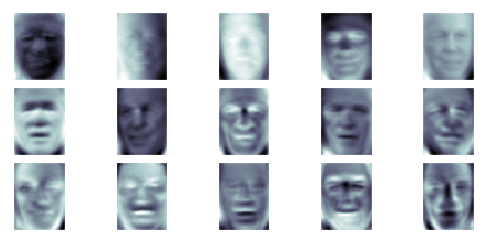

In [0]:
fig, axes = plt.subplots(3, 5, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
    


On the other hand, if we apply inverse_transform to return the data to its original dimension (only with the value of the 150 components) we can plot the image to see how similar it looks to the original. This time let's use matplotlib to compare to the original image.

In [0]:
#let's transform the matrix to its original dimensions by first doing
#an inverse transform of the output and then reshaping it to (1348,62,47)

projected = pca.inverse_transform(output)

The following image correspond to George W Bush


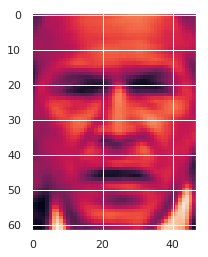

In [0]:
#Let's print the name of the class in the dataset and the reconstruction 
# of the pixels in a plot, given by its position in the dataset.
#but now we will use the PCA inverse dataset (150 PCs)

picture_number = 300 #remember there are 1348 images, any image can be observed 
                    #choosing a number between 0 and 1348 as well as the
                      #corresponding name.

print("The following image correspond to {}".format(faces.target_names[
    faces.target[picture_number]]))
plt.imshow(projected[picture_number].reshape(62,47))

# it is necessary to reshape to convert the image to its original seet (62,47)
#instead of (2914)

With only 150 components, the image is very similar to what we plotted before considering all the dimensions. 

<br> Additionally, if we extend this plotting to mor examples we can do a comparison between a full input and the reconstruction of the images with only 150 components. as follow:

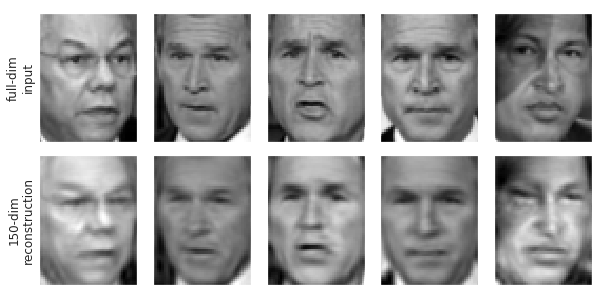

In [0]:
fig, ax = plt.subplots(2, 5, figsize=(10, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(5):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

### Conclusion 1:

<p align="justify"> 
The authors are right by claiming that it is necessary to reduce the dimensionality of the images by using linear projection, to build a face recognition model. Disregarding what model we use, the approach of considering reduced dimensions will save computational cost but also will not marginally have an impact on the predictions. Making it more efficient and equally accurate. Later down, I will also demonstrate that achieving a good prediction is also not given by the complexity of the model, but instead about what methodologies we use for learning, and: <p> 
 
  **This will demonstrate why not in all cases Fisherfaces or LDA outperform PCA or Eigenfaces.**

  

## VIII-III Predictive model using SVM

<br> In this section we will build a classifier. This time we will perform a random sampling and partitioning of the data, different from the approach that the authors fallowed.
 <br> Let me build the model by partitioning in a training set and a testing set corresponding to 70/30 respectively.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from time import time
import logging

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [0]:
n_samples, h, w = faces.images.shape


X = faces.data
y = faces.target


#let's partition the data in 70/30 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=4)


After partitioning we are going to use the number of components 150 and compute the time it takes to extract the top eigenfaces, as well as projecting the input data on the eigenfaces orthonormal basis

In [0]:
n_components = 150

print("Extracting the top {} eigenfaces from {} faces".format(
    n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in {} s".format(time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in {} s".format(time() - t0))

Extracting the top 150 eigenfaces from 943 faces
done in 0.3312644958496094 s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.03776264190673828 s


Now we will train the SVM to classify the images in a dimensionally reduced image space.

<p align="justify"> The characteristics of this classifier are that first it will find the best parameters C and Gamma. C evaluates the trade of between a correct classification and smooth decision surface, while Gamma tells how much influence a single training sample has in the model.
<br>After performing the calculation we will choose the parameters that best fit our model and will also print the time it takes to be trained with the training set:


In [0]:
print("Fitting the classifier to the training set")

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train_pca, y_train)
print("done in {}s".format(time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 47.04301929473877s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


After training, we perform the evaluation of the model with the testing set, and calculate the time it takes to test.
<br> Additionally, we will use the confusion matrix and the metrics Precision, Recall and F1-Score as indicators of how good our model is, with the aim to complement and contrast this metrics with the only metric used by the author that was the error rate.

In [0]:
# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in {}s".format(time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
done in 0.08778238296508789s
                   precision    recall  f1-score   support

     Ariel Sharon       0.90      0.72      0.80        25
     Colin Powell       0.73      0.84      0.78        82
  Donald Rumsfeld       0.74      0.72      0.73        36
    George W Bush       0.90      0.88      0.89       155
Gerhard Schroeder       0.75      0.75      0.75        28
      Hugo Chavez       0.94      0.71      0.81        21
Junichiro Koizumi       1.00      0.88      0.94        17
       Tony Blair       0.70      0.73      0.71        41

         accuracy                           0.82       405
        macro avg       0.83      0.78      0.80       405
     weighted avg       0.82      0.82      0.82       405

[[ 18   3   2   1   0   0   0   1]
 [  2  69   2   7   0   0   0   2]
 [  0   4  26   4   0   0   0   2]
 [  0  11   3 137   3   0   0   1]
 [  0   1   0   1  21   1   0   4]
 [  0   3   0   0   1  15   0   2]
 [  0   

In [0]:
# let's calculate the accuracy by using f1-score

clf.score(X_test_pca, y_test)

0.817283950617284

The model perform very well, given the value of the f1 score. Now we are going to check if the model overfits the data as a complement evaluation to the authors' thesis.


In [0]:
clf.score(X_train_pca, y_train)

1.0

<p align="justify"> Given that the accuracy is 100% with the training sample. Meaning that the model explains perfectly the data with what it was trained. With new unobserved data, the model does not perform as great. This consideration was not done by the authors in their thesis, and will be considered here as a complement to the discussion.
  
<br><p align="justify"> Following, we are going to plot the evaluations with matplotlib. To do this we will define a function that plots the comparison between the predicted class (name of the person) and the actual class.



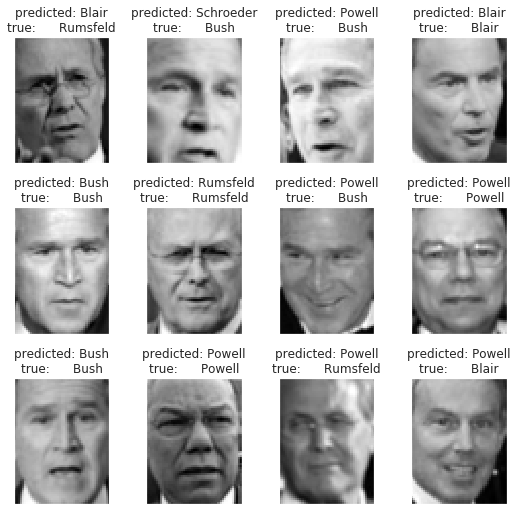

In [0]:

# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

        
# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: {}\ntrue:      {}'.format(pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

## VIII-IV Normalizing data to evaluate the efect of it in the performance of the algorithm

<br> <p align="justify">This evaluation is performed because the authors claimed that by normalizing the data, having it with a mean of 0 and varianze 1, the performance of the algorithm improves.


In [0]:
# lets normilize the data

faces.data

array([[138.        , 135.66667   , 127.666664  , ...,   1.6666666 ,
          1.6666666 ,   0.33333334],
       [ 71.333336  ,  56.        ,  67.666664  , ..., 247.66667   ,
        243.        , 238.33333   ],
       [ 84.333336  ,  97.333336  ,  72.333336  , ..., 114.        ,
        194.33333   , 241.        ],
       ...,
       [ 29.333334  ,  29.        ,  29.333334  , ..., 145.        ,
        147.        , 141.66667   ],
       [ 49.333332  ,  55.666668  ,  76.666664  , ..., 186.33333   ,
        176.33333   , 161.        ],
       [ 31.        ,  26.333334  ,  28.        , ...,  34.        ,
         42.        ,  69.666664  ]], dtype=float32)

In [0]:
from sklearn.preprocessing import normalize
from sklearn import preprocessing


Normalized_data = preprocessing.scale(faces.data)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [0]:
print("The mean is {}".format(round(Normalized_data.mean())))
print("The new Variance is {}".format(round(Normalized_data.var())))

The mean is -0.0
The new Variance is 1.0


In [0]:
Normalized_data


array([[ 1.0050247 ,  0.91436267,  0.6292838 , ..., -1.4910047 ,
        -1.4065766 , -1.3338116 ],
       [-0.4193132 , -0.8269849 , -0.7149908 , ...,  1.6567618 ,
         1.6757919 ,  1.6750888 ],
       [-0.14156732,  0.07647576, -0.61043596, ..., -0.05361011,
         1.054209  ,  1.7088019 ],
       ...,
       [-1.316646  , -1.4171487 , -1.5738328 , ...,  0.34305963,
         0.4496563 ,  0.45298636],
       [-0.8893448 , -0.83427083, -0.5133496 , ...,  0.87195253,
         0.82430863,  0.69740677],
       [-1.2810377 , -1.4754364 , -1.6037055 , ..., -1.0772738 ,
        -0.8914294 , -0.4572693 ]], dtype=float32)

In [0]:
X = Normalized_data
n_features = X.shape[1]

y = faces.target
target_names = faces.target_names
n_classes = target_names.shape[0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=4)


In [0]:
n_components = 150

print("Extracting the top {} eigenfaces from {} faces".format(
    n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 943 faces
done in 0.296s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.038s


In [0]:
print("Fitting the classifier to the training set")

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 46.552s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [0]:
# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
done in 0.089s
                   precision    recall  f1-score   support

     Ariel Sharon       0.80      0.64      0.71        25
     Colin Powell       0.74      0.88      0.80        82
  Donald Rumsfeld       0.74      0.78      0.76        36
    George W Bush       0.92      0.91      0.91       155
Gerhard Schroeder       0.81      0.75      0.78        28
      Hugo Chavez       1.00      0.57      0.73        21
Junichiro Koizumi       1.00      0.82      0.90        17
       Tony Blair       0.77      0.83      0.80        41

         accuracy                           0.83       405
        macro avg       0.85      0.77      0.80       405
     weighted avg       0.84      0.83      0.83       405

[[ 16   4   2   1   0   0   0   2]
 [  3  72   2   2   0   0   0   3]
 [  1   4  28   3   0   0   0   0]
 [  0   9   3 141   2   0   0   0]
 [  0   1   2   2  21   0   0   2]
 [  0   5   0   1   1  12   0   2]
 [  0   0   1   1   0 

In [0]:
clf.score(X_test_pca, y_test)

0.8345679012345679

In [0]:
clf.score(X_train_pca, y_train)

1.0

### Conclusion 2:

<p align="justify">By normalizing the data to have zero mean and unique varianze, the authors are right when claiming that it improves the performance of the algorithm. This was an acertive strategy for their Job.

## VIII-V Predictive model using 50 components and SVM

<br> In this section I will repeat the same modeling but this time using 50 components.

In [0]:
# now lets repeat the process only with 100 principal components
X = Normalized_data
n_features = X.shape[1]

y = faces.target
target_names = faces.target_names
n_classes = target_names.shape[0]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=4)

n_components = 50

print("Extracting the top {} eigenfaces from {} faces".format(
    n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 50 eigenfaces from 943 faces
done in 0.187s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.026s


In [0]:
print("Fitting the classifier to the training set")

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


Fitting the classifier to the training set
done in 14.980s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [0]:
# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
done in 0.036s
                   precision    recall  f1-score   support

     Ariel Sharon       0.81      0.68      0.74        25
     Colin Powell       0.88      0.89      0.88        82
  Donald Rumsfeld       0.76      0.72      0.74        36
    George W Bush       0.91      0.95      0.93       155
Gerhard Schroeder       0.80      0.86      0.83        28
      Hugo Chavez       1.00      0.76      0.86        21
Junichiro Koizumi       0.94      0.88      0.91        17
       Tony Blair       0.82      0.88      0.85        41

         accuracy                           0.87       405
        macro avg       0.87      0.83      0.84       405
     weighted avg       0.87      0.87      0.87       405

[[ 17   3   2   1   1   0   0   1]
 [  2  73   3   3   0   0   0   1]
 [  1   2  26   5   1   0   0   1]
 [  1   3   2 147   0   0   0   2]
 [  0   0   1   2  24   0   0   1]
 [  0   1   0   0   2  16   1   1]
 [  0   0   0   1   0 

In [0]:
clf.score(X_train_pca, y_train)

1.0

In [0]:
clf.score(X_test_pca, y_test)

0.8740740740740741

By normalizing the data and reducing the number of eigenfaces or dimensions, we found a better performance of the algorithm.

## VIII-VI Using Bagging as the machine learning algorithm learned in class

<br> <p align="justify">The following section was developed in order to prove many points.
  <br><p align="justify"> Firt, I am using bagging in order to reduce the variance of the model, this is done because the model was previously overfitting. By doing this we do sampling of the training set by 70% of the data twenty times. (This can also be a very good example to the theory we saw in the first class, that by increasing the number of samples, we reduce the chances of finding samples that perfectly explain the data, but that by having this the model will not perform so well with unseen data).
    <br><p align="justify"> Second, to bring the theory from class that 

In [0]:
from sklearn. ensemble import  BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
bg = BaggingClassifier(GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False), max_samples= 0.7, max_features = 1.0, n_estimators = 20)
bg.fit(X_train_pca, y_train)

BaggingClassifier(base_estimator=GridSearchCV(cv=5,
                                              error_score='raise-deprecating',
                                              estimator=SVC(C=1.0,
                                                            cache_size=200,
                                                            class_weight='balanced',
                                                            coef0=0.0,
                                                            decision_function_shape='ovr',
                                                            degree=3,
                                                            gamma='auto_deprecated',
                                                            kernel='rbf',
                                                            max_iter=-1,
                                                            probability=False,
                                                            random_state=None,
                   

In [0]:
# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = bg.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
done in 0.440s
                   precision    recall  f1-score   support

     Ariel Sharon       0.84      0.64      0.73        25
     Colin Powell       0.85      0.94      0.89        82
  Donald Rumsfeld       0.79      0.75      0.77        36
    George W Bush       0.91      0.96      0.93       155
Gerhard Schroeder       0.88      0.75      0.81        28
      Hugo Chavez       1.00      0.76      0.86        21
Junichiro Koizumi       1.00      0.82      0.90        17
       Tony Blair       0.86      0.90      0.88        41

         accuracy                           0.88       405
        macro avg       0.89      0.82      0.85       405
     weighted avg       0.88      0.88      0.88       405

[[ 16   4   2   1   1   0   0   1]
 [  2  77   1   2   0   0   0   0]
 [  0   4  27   5   0   0   0   0]
 [  1   2   2 149   0   0   0   1]
 [  0   0   2   4  21   0   0   1]
 [  0   2   0   0   1  16   0   2]
 [  0   1   0   1   0 

In [0]:
bg.score(X_test_pca, y_test)

0.8814814814814815

In [0]:
bg.score(X_train_pca, y_train)

0.9798515376458112

### Conclusion 3:

<br><p align="justify">By normalizing the data, as the authors claimed, we found better performance and by reducing the number of dimensions as well as applying a bagging methodology for sampling, we were able to reduce the overfitting and achieve a better performance on the Eigenfaces and PCA methods. 

## VIII-VII Fisherfaces

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNC

In [0]:
n_samples, h, w = faces.images.shape


X = faces.data
y = faces.target


#let's partition the data in 70/30 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=4)


In [0]:


print("Performing linear projection applying lda")

t0 = time()
lda = LDA()
X_train_lda = lda.fit(X_train,y_train)
X_test_lda = lda.transform(X_test)
      
print("done in %0.3fs" % (time() - t0))





Performing linear projection applying lda
done in 2.201s


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### Conclusion 4

<br><p align="justify">By just performing Linear projection by using LDA, I found that the approach methodology proposed by the authors was correct and needed to perform Face Recognition. As it can be observed, there is a warning that says that the Variables are Collinear, meaning that there is a linear combination of variables among each other. In mathematical terms, this is due because the determinant of a matrix is zero, or in other words that the matrix is singular. 
According to the authors the within-class scatter matrix that is used to perform LDA is always singular and therefore we face a problem of collinearity. The reason behind it is beacuse the number of images in the training (that in this case is at most 1348x0.7) set is a lot smaller than the number of pixels (which is 62*47 = 2914) in each one of the images. 

<br><br><p align="justify"> Thus, the authors correctly claim that a better approach to this problem is necessary and introduce Fisherfaces in order to make the within-class matrix non-singular. To do so, they apply PCA to reduce the number of dimensions of the training set so the matrix is non-singular and therefore there is not a multicollinearity problem. In our case we need to reduce the dimensionality to N-c of our training set which means 1348x0.7 - 8 = 934 to not have multicollinearity.
 

In [0]:
pca = PCA(n_components = 150, svd_solver='randomized', whiten=True)
pca.fit(faces.data)


output = pca.fit_transform(faces.data)
output.shape

(1348, 150)

In [0]:
n_components = 934 

pca = PCA(n_components= n_components, svd_solver='randomized',
          whiten=True)
pca.fit(X_train)



eigenfaces = pca.components_.reshape((n_components, h, w))

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [0]:
X_train_pca.shape

(943, 934)

In [0]:
X_test_pca.shape


(405, 934)

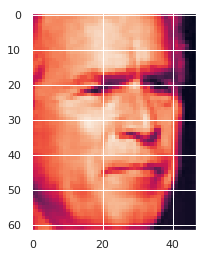

In [0]:
projected = pca.inverse_transform(X_train_pca)

plt.imshow(projected[300].reshape(62,47))

In [0]:
projected1 = projected[300].reshape(62,47)

In [0]:
projected1.shape

(62, 47)

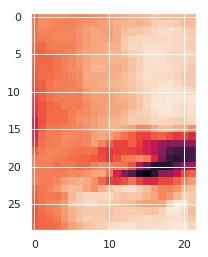

In [0]:
plt.imshow(projected1[1:30,3:25])

In [0]:
lda = LDA()
lda.fit(X_train_pca,y_train)

X_train_lda = lda.fit_transform(X_train_pca,y_train)
X_test_lda = lda.transform(X_test_pca)

In [0]:
X_train_lda.shape

(943, 7)

We encountered no problems this time and now we will train the K nearest neighbor algorithm with the dimensionallity reduced data performed by LDA.

In [0]:
print("Fitting the classifier to the training set")


clf = KNC(n_neighbors=10)

clf = clf.fit(X_train_lda, y_train)
print("done in %0.3fs" % (time() - t0))


Fitting the classifier to the training set
done in 9.891s


In [0]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_lda)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
done in 0.028s
                   precision    recall  f1-score   support

     Ariel Sharon       0.46      0.24      0.32        25
     Colin Powell       0.71      0.51      0.60        82
  Donald Rumsfeld       0.26      0.33      0.29        36
    George W Bush       0.57      0.48      0.52       155
Gerhard Schroeder       0.57      0.29      0.38        28
      Hugo Chavez       0.21      0.67      0.32        21
Junichiro Koizumi       0.35      0.53      0.42        17
       Tony Blair       0.31      0.37      0.34        41

         accuracy                           0.45       405
        macro avg       0.43      0.43      0.40       405
     weighted avg       0.51      0.45      0.46       405

[[ 6  3  4  5  0  4  0  3]
 [ 3 42  8 15  1  8  1  4]
 [ 1  1 12  8  1  8  1  4]
 [ 1 11 19 75  3 19 11 16]
 [ 0  0  2  9  8  7  0  2]
 [ 1  0  1  1  1 14  2  1]
 [ 0  0  0  3  0  2  9  3]
 [ 1  2  1 15  0  5  2 15]]


In [0]:
clf.score(X_test_lda, y_test)

0.4469135802469136

In [0]:
clf.score(X_train_lda, y_train)

1.0

### Conclusion 5
In this case, I have demonstrated that FisherFaces Method, for this particular data set that contains not only lighting but also facial expressions and different positions, does not perform as good as LDA. 

The explenation of this is out of scope for this assigment at UTS and will develop it later on with a stronger conclusion and analysis. For now the reader can have an overview and a idea of what this research was about, the methodology applied and the conclusions that they got. 

# Notes to the reader.

If you are reading this in GitHub, I recomend to open the file in Colab because some of the features are lost when I saved the file in Github.